<a href="https://colab.research.google.com/github/parksanghan/machine_learning_Deep_learning/blob/main/ai_chapter_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # 훈련 세트 , 데이터 세트 로드

이미지는 numpy로 인코딩 된 상태이며  레이블은 0~9까지의 숫자 배열이다.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
len(train_labels  )

60000

In [ ]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
len(test_labels)

10000

###신경망 제작해버리기

신경망이란
인간의 뇌구조를 모방한 것으로
뉴런 (Neuron): 신경망의 기본 단위로, 각각의 뉴런은 입력값을 받아 계산을 수행한 후 결과를 다음 뉴런으로 전달합니다.

층 (Layer): 신경망은 여러 층으로 구성됩니다. 각 층에는 다수의 뉴런이 있으며, 데이터를 처리하는 방식에 따라 역할이 다릅니다.

입력층 (Input Layer): 데이터를 신경망에 입력하는 첫 번째 층.
은닉층 (Hidden Layer): 중간에 위치하여 입력 데이터를 변환하고 처리하는 역할을 합니다. 신경망의 깊이에 따라 여러 은닉층이 있을 수 있습니다.
출력층 (Output Layer): 최종 예측값 또는 결과를 출력하는 층.
가중치 (Weights): 뉴런 간의 연결 강도를 나타내며, 학습 과정에서 데이터를 기반으로 조정됩니다.

활성화 함수 (Activation Function): 뉴런의 출력을 결정하는 함수로, 비선형성을 추가하여 복잡한 패턴을 학습할 수 있게 해줍니다. 대표적인 활성화 함수로는 ReLU, 시그모이드, 소프트맥스 등이 있습니다.

신경망의 동작 원리
입력 데이터 전달: 데이터가 입력층을 통해 신경망에 들어옵니다.

가중치 계산: 각 뉴런은 입력값에 가중치를 곱하고, 그 합을 구합니다.

활성화 함수 적용: 합계를 활성화 함수에 통과시켜 출력을 계산합니다.

출력 전달: 계산된 값이 다음 층의 뉴런들에 전달됩니다.

역전파 (Backpropagation): 결과와 실제 값의 차이(손실)를 최소화하기 위해

가중치를 조정하는 과정입니다. 경사 하강법 등의 알고리즘을 통해 가중치가 조정됩니다.

신경망의 종류
단층 신경망 (Single-Layer Neural Network): 입력층과 출력층만 있는 단순한 구조.

다층 신경망 (Multi-Layer Neural Network): 여러 은닉층을 포함하며, 더 복잡한 패턴을 학습할 수 있습니다.

컨볼루션 신경망 (Convolutional Neural Network, CNN): 이미지 처리에 주로 사용되는 신경망.

순환 신경망 (Recurrent Neural Network, RNN): 시간 순서가 중요한 데이터를 처리하는 신경망, 예를 들어 시계열 데이터나 자연어 처리에 사용됩니다.

### 가중치 부여
각 입력 값에 대해 해당 값이 어떤 뉴런에 얼마나 영향을 미칠지를 결정하는 값입니다. 가중치는 신경망의 학습을 통해 최적화되며, 신경망의 핵심 요소 중 하나입니다.
선형회귀에서 사용하는 식
 y=w
1
​
 x
1
​
 +w
2
​
 x
2
​
 +⋯+w
n
​
 x
n
​
 +b

즉 , 각 피처스에 대한 기울기를 구하여서 기울기를 통해 가중치를 부여하는 것입니다.

### 활성화 함수
비선형성을 추가하여 신경망이 더 복잡한 패턴을 학습할 수 있게 해줍니다.

활성화 함수는 가중치와 입력의 선형 결합을 입력으로 받아, 이 값을 변환합니다.

예를 들어, 시그모이드 함수는 입력값
z를 받아 0과 1 사이의 값으로 변환해줍니다
이 출력값

a는 신경망의 다음 층으로 전달되어 그 층에서 다시 계산되고, 이 과정이 반복됩니다.


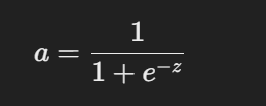

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(512,activation="relu"),#ReLU(z)=max(0,z)
                          # 입렵값이 0보다 크면 그대로  작거같이면 0 출력 주로 은닉층에서 사용
                          layers.Dense(10, activation="softmax")
                          # 출력층에서 사용되는 함수로 , Softmax는 출력층에서 사용되는 활성화 함수로, 여러 클래스로 분류할 때 확률 분포를 반환합니다.
                          #
                          ])

다중 클래스 분류에서 Softmax의 동작 방식:
출력층에서 신경망의 마지막 레이어가 클래스 수만큼의 출력을 생성합니다. 예를 들어, 10개의 클래스를 예측하는 문제라면, 출력층은 10개의 뉴런을 가집니다.

Softmax 함수는 이 10개의 출력값을 각각의 클래스에 해당하는 확률 값으로 변환합니다. 이 확률 값들은 0과 1 사이의 값이 되며, 모든 클래스의 확률 합은 1이 됩니다.

예를 들어, 10개의 출력값이
𝑧
1
,
𝑧
2
,
.
.
.
,
𝑧
10
z
1
​
 ,z
2
​
 ,...,z
10
​
 이라면, 각 출력값
𝑧
𝑖
z
i
​
 는 Softmax를 통해 아래와 같이 변환됩니다:

다중 클래스 분류에서 Softmax의 동작 방식:
출력층에서 신경망의 마지막 레이어가 클래스 수만큼의 출력을 생성합니다. 예를 들어, 10개의 클래스를 예측하는 문제라면, 출력층은 10개의 뉴런을 가집니다.

Softmax 함수는 이 10개의 출력값을 각각의 클래스에 해당하는 확률 값으로 변환합니다. 이 확률 값들은 0과 1 사이의 값이 되며, 모든 클래스의 확률 합은 1이 됩니다.

예를 들어, 10개의 출력값이
𝑧
1
,
𝑧
2
,
.
.
.
,
𝑧
10
z
1
​
 ,z
2
​
 ,...,z
10
​
 이라면, 각 출력값
𝑧
𝑖
z
i
​
 는 Softmax를 통해 아래와 같이 변환됩니다:

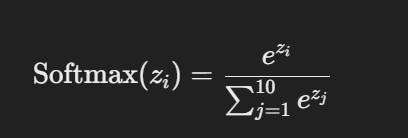

### 신경망이 훈련을 때 컴파일 단계에서 3가지가 필요.
 # 옵티마이저 : 최적화

가중치를 업데이트(최적화)하는 과정

 # 순실 함수

훈련 데이터에서 모델의 성능을 측정하는 방법 옳은 방향으로 학습할 수 있도록 도와주는 것

In [ ]:
model.compile(optimizer="rmsprop", # 가중치 업데이트 알고리즘
              loss="sparse_categorical_crossentropy", # 다중 분류 순실 함수
              metrics=["accuracy"]) # 정확도


In [ ]:
train_images= train_images.reshape((60000,28*28))
train_images= train_images.astype("float32")/255
test_images= test_images.reshape((10000,28*28))
test_images= test_images.astype("float32")/255


In [ ]:
model.fit(train_images,train_labels,epochs=5,batch_size=128) # 에폭 : 데이터 셋 학습 반복횟수 , # 배치 사이즈는 128씩 나눠서 학습

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8718 - loss: 0.4421
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9637 - loss: 0.1212
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9794 - loss: 0.0694
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9843 - loss: 0.0506
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9890 - loss: 0.0385


In [ ]:
test_digits = test_images[0:10]
predictions =  model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([1.9427004e-08, 3.3476681e-09, 3.5249489e-06, 1.7356184e-05,
       1.6798147e-12, 2.3571324e-08, 8.7816066e-13, 9.9997848e-01,
       1.2861838e-08, 4.7508453e-07], dtype=float32)

In [ ]:
predictions[1]

array([5.6924860e-09, 7.2149255e-06, 9.9999112e-01, 8.5966030e-07,
       7.4253314e-14, 3.9563687e-08, 1.1727370e-08, 4.4986255e-14,
       7.4682310e-07, 2.1093844e-14], dtype=float32)

In [ ]:
test_labels[0]

7

# 새로운 데이터에서 모델 평가하기

In [ ]:
test_loss , test_acc =  model.evaluate(test_images , test_labels) # 성능 평가
print(f"테스트 손실:{test_loss}")
print(f"테스트 정확도:{test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.0793
테스트 손실:0.06612526625394821
테스트 정확도:0.9797999858856201


In [ ]:
train_loss , train_acc = model.evaluate(train_images,train_labels)
print(f"테스트 손실:{train_loss}")
print(f"테스트 정확도:{train_acc}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9935 - loss: 0.0250
테스트 손실:0.025016169995069504
테스트 정확도:0.9934166669845581


훈련 세트 정확도와 테스트 세트의 정확도의 차이는 과대적합의 정도입니다.3

###슨상님 왜 LOSS가 발생하나요
 model.evaluate()에서 나오는 손실 값(loss)은 모델이 예측한 값과 실제 값 간의 차이를 나타내는 값입니다
모델 예측:

주어진 입력 데이터에 대해 모델이 예측한 값(출력값)을 계산합니다.
실제 값과의 비교:

예측된 값과 실제 값(타깃 데이터) 간의 차이를 계산합니다. 이 차이는 손실 함수(loss function)에 의해 정량화됩니다.

손실 함수:

손실 함수는 예측 값과 실제 값 간의 차이를 계산하는 수학적 함수를 의미합니다. 예를 들어:
회귀 문제에서는 일반적으로 평균 제곱 오차(Mean Squared Error, MSE)를 사용합니다.
분류 문제에서는 범주형 교차 엔트로피(categorical crossentropy)나 희소 범주형 교차 엔트로피(sparse categorical crossentropy)를 사용합니다.
평균 손실 계산:

손실 함수는 각 샘플에 대한 손실 값을 계산하고, 이 값을 평균하여 전체 데이터셋의 손실 값으로 반환합니다.


# 신경망을 위한데이터 표현

## 스칼라 랭크 0 텐서

In [ ]:
import numpy as np
x  = np.array(12)
x

array(12)

In [ ]:
x.ndim #dimensions 차원수

0

## 벡터 랭크 1 텐서

In [ ]:
x =  np.array([12,3,6,14])
x

array([12,  3,  6, 14])

In [ ]:
x.ndim

1

# 행렬 랭크 2 텐서

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

##랭크-3 텐서와 더 높은 랭크의 텐서

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

### 이미지 출력

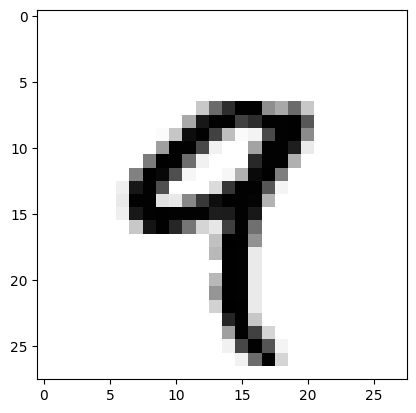

In [ ]:
import matplotlib.pyplot as plt
digit =  train_images[4]
plt.imshow(digit,cmap=plt.cm.binary) # cmap 색상 값 지정인자  cm.binary 가장 낮은픽셀
plt.show()

In [ ]:
train_labels[4]

9

##numpy 조작

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
my_slice= train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

### 텐서플로우
채널 마지막 방식

(samples , height, width , color_depth(피처))

채널 우선 방식

(samples,color_depth,height,width)

# 텐서 연산

원소별 연산


In [ ]:
def naive_relu(x): # relu 는 원소별연산
  assert len(x.shape) == 2 # x가 2D 넘파이 배열이면
  x = x.copy() # 입력 배열을 수정하지 않도록 복사
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j],0) # 대충 음수들은 0으로 대체
  return x

In [ ]:
def naive_add(x,y):
  assert len(x.shape) == 2  # x가 2d 넘파이 배열이면
  assert x.shape == y.shape # 둘다 2D 넘파이 배열이면
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j] # 각 원소끼리 덧셈
  return x




In [ ]:
import time
x= np.random.random((20,100)) # 20 x 100  array[20][100] 형태랜덤배열선언
y= np.random.random((20,100))
t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z,0.) # 대충 천번동안 x + y 값을 더했을때 음수면 0으로 대체하는 코
print("Took:{0:.2f} s".format(time.time() - t0))

NameError: name 'np' is not defined

In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

In [ ]:
import numpy as np
x = np.array([1,2,3,4])
x

array([1, 2, 3, 4])

##브로드 캐스팅
위에 코드에서는 동일한 크기의 배열차원에서 연산을 수행하는데 서로 다른 크기의 차원수끼리 연산을하면 어떻게 되나

모호하지 않고 실행가능하다면 작은 텐서가 큰텐서의 크기를 맞춰 브로드 캐스팅이 됩니다.

1. 큰 텐서의 ndim 에 맞록 작은 텐서에 (브로드캐스팅 축 )축 추가
2. 작은 텐서가 새축을 따라서 큰텐서의 크기에 맞도록 반복



In [ ]:
import numpy as np

x = np.random.random((32,10))
y = np.random.random(10,)

In [ ]:
def navite_add_maxtrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0] # 행수가 같은지 확인

  x = x.copy()
  for i in range(x.shape[0]): # x배열의 0번째 행
    for j in range(x.shape[1]):  # x배열의 1번째 행
      x[i,j] += y[j]
  return x

## 크기가다른 두 텐서에 브로드캐스팅으로 원소별 MAXIUM 연산적용

텐서 곱셈

In [ ]:
x= np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)

In [ ]:
def naive_vector_dot(x,y):
  assert len(x.shape)==1
  assert len(y.shape)==1
  assert x.shape[0]== y.shape[0]
  x= x.copy()
  for i in range(x.shape[0]):
    z= x[i] * y[i]

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(len(a.shape), len(b.shape))  # 출력: 1 1
print(a.shape[0],  b.shape[0]) # 배열의 개수

1 1
3 3


In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
import numpy as np

x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# x의 첫 번째 행 (인덱스 0)을 출력
print(x[0, :])  # 출력: [1 2 3]

# x의 두 번째 행 (인덱스 1)을 출력
print(x[1, :])  # 출력: [4 5 6]

# x의 세 번째 행 (인덱스 2)을 출력
print(x[2, :])  # 출력: [7 8 9]

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

##텐서 크기 변환

In [ ]:
train_images = train_images.reshape((60000*28*28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x

array([[0., 1.],
       [2., 3.],
       [4., 5.]])

In [ ]:
x = np.zeros((300, 20)) # 300 X 20 으로 0으로 채움
x = np.transpose(x) # 행 열 뒤집기
x.shape

(20, 300)

#텐서 연산의 기하학적 해석

텐서연산도  곧 좌표의 포인트로 해석핧 수 있습니다.
A = [0.5,1] 이라면


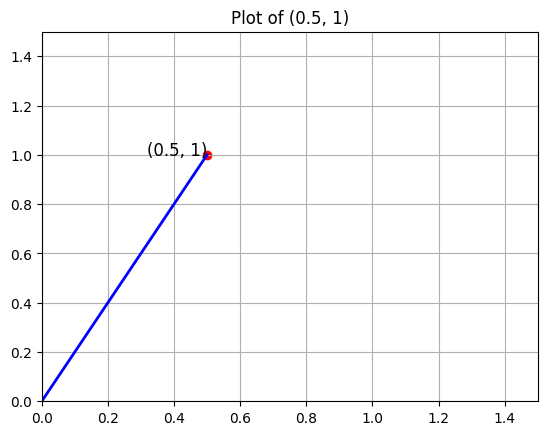

In [ ]:
import matplotlib.pyplot as plt

x = 0.5
y = 1
# 그래프 그리기
plt.scatter(x, y, color='red')  # (0.5, 1) 좌표를 빨간색 점으로 표시
plt.text(x, y, f'({x}, {y})', fontsize=12, ha='right')  # 좌표 옆에 텍스트 추가

#       x 축 나타내는리스트 ,  Y 축 나타내는 리스트 ,
plt.plot([0,x],[0,y],color='blue',linewidth=2)
# 그래프 축과 제목 설정
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Plot of (0.5, 1)")

# 그래프 출력
plt.grid(True)
plt.show()

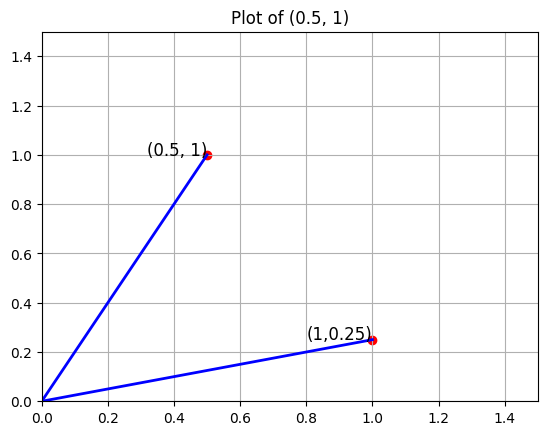

In [ ]:
import matplotlib.pyplot as plt

x = 0.5
y = 1

x_1 = 1
y_2 = 0.25
# 그래프 그리기
plt.scatter(x, y, color='red')  # (0.5, 1) 좌표를 빨간색 점으로 표시
plt.text(x, y, f'({x}, {y})', fontsize=12, ha='right')  # 좌표 옆에 텍스트 추가
plt.scatter(x_1,y_2,color='red')
plt.text(x_1,y_2,f'({x_1},{y_2})',fontsize=12,ha='right')
#       x 축 나타내는리스트 ,  Y 축 나타내는 리스트 ,
plt.plot([0,x],[0,y],color='blue',linewidth=2)
plt.plot([0,x_1],[0,y_2],color="blue",linewidth=2)
# 그래프 축과 제목 설정
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Plot of (0.5, 1)")

# 그래프 출력
plt.grid(True)
plt.show()

위와 같이 두 벡터가 주어졌을때 두 벡터의 합을 통해 벡터 A 에서 벡터 B를 더하는 것은 점 A 를 새로운 위치로 복사하는 동작인데 원래 점 A로부터 새로운 위치 까지 거리와 방향은 벡터 B에 의해 결정됩니다.

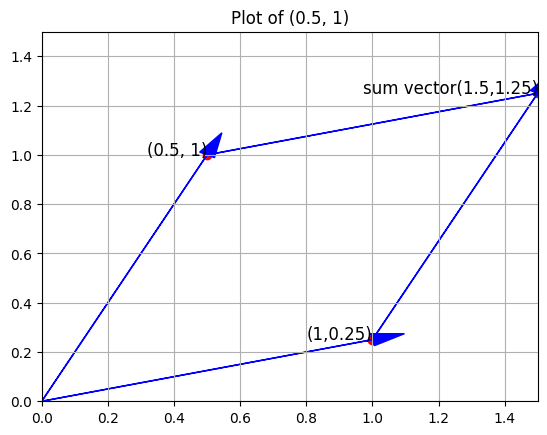

In [ ]:
import matplotlib.pyplot as plt

x = 0.5
y = 1

x_1 = 1
y_2 = 0.25

sum_x =  x + x_1
sum_y  = y + y_2

# 그래프 그리기
plt.scatter(x, y, color='red')  # (0.5, 1) 좌표를 빨간색 점으로 표시
plt.text(x, y, f'({x}, {y})', fontsize=12, ha='right')  # 좌표 옆에 텍스트 추가
plt.scatter(x_1,y_2,color='red')
plt.text(x_1,y_2,f'({x_1},{y_2})',fontsize=12,ha='right')

# 합 벡터 좌표 표시
plt.scatter(sum_x, sum_y, color='green')
plt.text(sum_x, sum_y, f'sum vector({sum_x},{sum_y})', fontsize=12, ha='right')

# 벡터를 화살표로 표현
plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
plt.arrow(0, 0, x_1, y_2, head_width=0.05, head_length=0.1, fc='blue', ec='blue')

# 합 벡터를 화살표로 표현
plt.arrow(x, y, sum_x - x, sum_y - y, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
plt.arrow(x_1, y_2, sum_x - x_1, sum_y - y_2, head_width=0.05, head_length=0.1, fc='blue', ec='blue')

# 그래프 축과 제목 설정
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Plot of (0.5, 1)")

# 그래프 출력
plt.grid(True)
plt.show()


### 텐서 연산의 기하학적 해석
 텐서 연산의 기하학적 해석은 총 4가지로 분류할 수 있습니다.

 이동: 위와 같이 한점에 벡터를 더하면 고정된 방향으로 고정된 양만큼 이점을 이동시키는 것.

 회전:  θ(theta)세타 데이터만큼 2D 벡터를 반시계 방향 만큼 회전한 결과는 2X2 행렬 R = [[cos(θ,-sin(θ)], [sin(θ),cos(θ)]] 와 점곱하여 구할 수 있습니다.

 크기변경 : 2X2 행렬 S = [[horizontal_factor,0] , [0,vertical_factor]]
 와 점곱하여 수직과 수평방향으로 크기를 변형시킬 수 있습니다.

 [1  0]   [x]   [1*x + 0*y]   [x]
[0 -0.5] * [y] = [0*x - 0.5*y] = [-0.5y]
이런식으로 말이에요

선형 변환: 임의의 행렬과 점곱하면 선형 변환이 수행됩니다.

y = a1x1 + a2x2 + a3x3+ ... + b

아핀 변환: (어떤 행렬을 점곱하여 얻는)선형 변환과 (벡터를 더해 얻는) 이동의 조합입니다.
즉, 선형 변환에서 평행을 이동을 더한 변환입니다.
y = W *(행렬곱) x  + b

relu 활성화 함수를 사용하는 Dense 층:  아핀 변환의 중요한 성질 중 하나는 여러 아핀 변환을 반복해서 적용해도 하나의 아핀 변환이 된다는 것이다.

** 이게 무슨말이냐
이미지를 30도 회전하는 아핀 변환 A가 있다고 가정해 봅시다.

이미지를 2배 확대하는 아핀 변환 B가 있다고 가정해 봅시다.

이미지를 5만큼 오른쪽으로 이동하는 아핀 변환 C가 있다고 가정해 봅시다.

이미지에 A, B, C 변환을 순차적으로 적용하는 것은, 즉 A -> B -> C 순서로 변환하는 것은 하나의 아핀 변환 D 와 동일한 결과를 낳습니다.


다음과 같은 2개의 아핀 변환이 있다면,

affine2(affine(x)) =  *W2 X (W1 X x + b1) + b2 =*

*W2 X (W1x + b1) + b2*
=> (W2 X W1)x +  (W2 X b1 + b2)


여기서 이진 선형 변환 부분은 행렬 W1 X W2 이고 이동 부분이 벡터 W2 X b1 + b2 입니다.

*y = ax + b* 와 같습니다

결국 활성화 함수 없이 여러 개의 Dense 층으로만 구성된 다중 신경망은 하나의 Dense 층과 같다.`


In [ ]:
# 위의 Dense 로만 이루어진 모델은 입력에 대해 아래와 같이 변화합니다.
output = relu(dot(W,input)+b)

간단한 방법으로 가중치를 업데이트 하는 것은 가중치 행렬은 모두 고정한 상태에서

In [ ]:
weights = [0.3,0.3,0.3]

배치 데이터를 정방향 패스에 통과시킨 후 모델의 손실이 0.5가 나왔을때 가중치 값을 0.35로 변환하고 통과시키면 0.6으로 증가했을때 0.25로 했을때 0.4로 감소한다면 이러한 것을 통해 손실을 줄입니다.
이러한 과정을 더 나은 방법을 쓰는게 경사 하강법입니다.

경사하강법은 모델에 사용하는 모든 함수는 입력을 매끄럽고 연속적인 방식으로 변환합니다.

예를 들어
*z =  x + y* 에서 y 를 조금 변경하면 z가 조금만 변경됩니다. y 의 변경 방향을 알고 있다면 z의 변경 방향을 추측할 수 있습니다.

수학적으로 이를 미분 가능 하다고 말합니다.
이를 활용하여 모델의 가중치를 조금 변화했을때 손실값이 예측가능한 방향으로 바뀌는 것을 응용할 수 있습니다.

그래디언트라는 수학연산을 사용하여 모델 가중치를 여러 방향으로 이동했을 떄 손실이 얼마나 변하는지 설명할 수 있습니다.

그래디언트를 사용하면 손실이 감소하는 방향으로 가중치를 한번에 이동할 수 있습니다.

## 그래디언트

그래디언트에서 다변수 함수에서의 기울기이다.
1차원에서는 미분으로 기울기를 구하지만 다차원인 경우 각각의 변수에 대해 변화율을 구하는 것이 그래디언트이다.
$\bigtriangledown f(x,y)=( \frac{∂f}{∂x} , \frac{∂f}{∂y} )$

예를 들어 $f(x,y) = 3x^2+ 4y$일때

$x$ 를 편미분하면

$\frac{∂f}{∂x} = \frac{∂}{∂x}(3x^2 + 4y) = 6x $

$y$ 를 편미분하면

$\frac{∂f}{\partial y} = \frac{∂}{∂y}(3x^2 + 4y)= 4$ 이고

이제 기울기 벡터는 아래와 같습니다.

$\bigtriangledown f(x,y) =  (6x,4)$ 와 같습니다.

즉 기울기를 통해 x 방향으로는 항상 6x 만큼 변화
y 방향으로는 4 만큼 변화하는것을 알 수 있습니다.

최종적으로  $\bigtriangledown f(1,2) = (6(1),4) = (6,4)$
 와 같습니다.

## 도함수

실수 $x$ 를 새로운 실수 $y$로 매핑하는 연속적이고 매끄러운 함수
$f(x) = y$에서 이함수에서 연속적으로 x를  조금 바꾸면 y가 조금만 변경되는데 이를 연속성의 개념입니다.

epsilon_x 가 충분히 작다면 어떤 포인트 p 에서 기울기 a 의 선형 함수로 f를 근사할 수 있습니다. 따라서 epsilon_y =  a * epsilon_x 와 같습니다.

$f(x + epsilon_x)$

도함수의 개념은 이 표면이 연속적이고 매끄러운 어떤 함수에도 적용할 수 있습니다.
텐서 연산(또는 텐서 함수)의 도함수를 그레이디언트라고 부릅니다.

그레이디언트는 텐서를 입력으로 받는 함수로 도함수의 개념을 일반화한 것이다.
비슷 한 방식으로 텐서함수의 그레이디언트는 이 함수가 설명하는 다차원 표면의 곡률이다. -> 즉 , 입력 파라미터가 바뀔 떄 함수의 출력이 어떻게 바귀는지 결정

텐서의 함수 $f(w)$ 입장에서는 그래이디언트의 반대 방향으로  w가 움직이면 losss_value = f(w) 의 값을 줄일 수 있다.

예를 들어서

$W_1 =  (W_0-train_x(학습률))*grad(f(W_0),W_0) 이다$

즉 ,
가중치1 = (가중치 0  - 학습률)*손실함수 f(W_0)의 기울기 - 손실 함수를  W0 에 대해 편미분한 값(편도함수)

-> $f(w_0)$  :  모델의 가중치가 $W_0$ 일때 손실 값

$grad(f(W_0),W_0)$ : 손실함수 $f(W_0)$를 가중치 $W_0$ 에 대해 편미분한 값. 즉 => $W_0$가 조금 변할 때 손실 함수가 얼마나 변하는지를 나타내는 값

## 확률적 경사 하강법



미분 이 가능한 함수가 주어지면 이론적으로 이 함수의 최솟값을 해석적으로 구할수 있다.  함수의 최솟값은 도함수가 0인지 지점이다.

즉 w 에 대한 식  $grad(f(W),W)=0$ 을 활용하면 됩니다.
이 식은 N개의 변수로 이루어진 다항식인데 이때  N은 모델의 가중치 개수입니다.

가중치를 업데이트 할때 다음 가중치를 계싼할 때 현재 그레이디언트 값만 보지 않고 이전에 업데이트 된 가중치를 여러가지 방식으로 고려하는 SGD가 있습니다. -> 이걱들을 최적화방법 또는 옵티마이저라고 부릅니다.

이러한 방법들에서는 모멘텀이 중요합니다.


## 모멘텀

모멘텀의 동작원리 :  모멘텀은 경사하강법에서 학습을 더 빠르고 안정적으로 진행하기 위한 방법으로 기본적으로 경사하강법은 그래이디언트에 따라 가중치를 업데이트 하지만 모멘텀은 이전 업데이트 정보를 함께 사용하여 최적화 과정을 가속화하고 진동을 줄입니다.

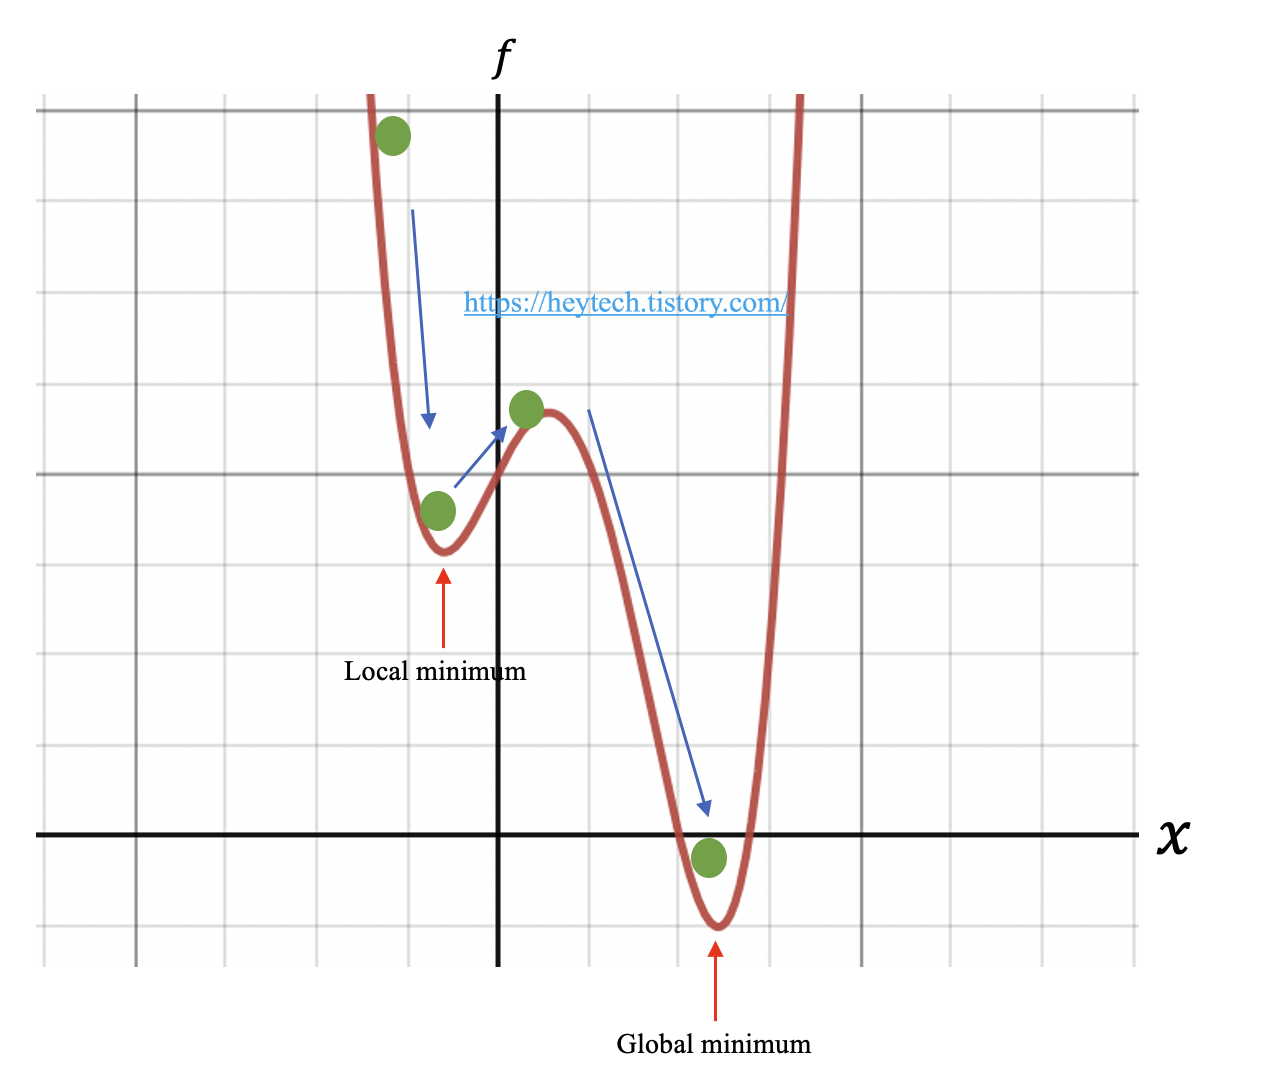

 위에 그래프에서 나오듯이 어떤 파라미터 값에는 지역 최솟값에 도달합니다. 해당 지점에서 왼쪽으로 이동해도 손실이 증가, 오른족으로 가도 손실이 증가합니다. 대상 파라미터가 작은 학습률을 가진 경사하강법으로 최적화되었다면 최적화 과정이 전역 최솟값으로 향하지 못하고 이 지역 최솟값에 갇히게 된다.

 이것을 해결하는 것이 모멘텀인데 이는 즉 , 현재 기울기 값 뿐만 아니라 현재 속도를 함께 고려하여 각 단계에서 움직입니다.
 실전에서는 현재 그래이디언트 값 뿐만 아니라 이전에 업데이트 한 파라미터에 기초하여 파라미트 W 를 업데이트르 합니다.
 아래 코드는 간단한 예시입니다.

 기본 경사하강법 :  $W_{t+1} = W_t- \eta\bigtriangledown f(W_t)$

 $다음 가중치 벡터 = 현재 가중치 벡터 - 학습률 *현재 가중치 기울기  $

 모멘텀 업데이트 :  이전 그레이디언트와 현재 그레이디언트를 모두 반영하여 가중치를 업데이트

 $v_{t+1} =  \gamma v_t + \eta \bigtriangledown f(W_t) $

$속도 = 모멘텀 상수 * 이전 속도  + 이전 가중치 기울기 $

 $W_{t+1} =  W_t + v_{t+1}$

 $다음 가중치 = 현재 가중치 +  속도$

In [ ]:

post_velocity = 0
momentum = 0.1 # 모멘텀 상수
while loss> 0.01:
  w ,  loss ,gradient = get_current_parameters()
  velocity = momentum * past_velocity - learning_rate * gradient
  w = w + velocity - learning_rate * gradient
  past_velocity = velocity
  update_parameter(w)

## 도함수 연결

### 역전파 알고리즘

2개의 층을 가진 모델의 경우 가중치에 대한 손실의 그레이디언트를 어떻게 구할 수 있나 ?

역전파는 간단한 연산의 도함수를 사용해서 이런 기초적인 연산을 조합한 복잡한 연산의 그레이디언트를 쉽게 계산하는 방법입니다.

신경망은 서로 연결된 많은 텐서 연산으로 구성되며 아래와 같이 표현 될 수 있습니다.
이 함수와 관련된 기초적인 연산은 dot,relu,softmax, 손실함수 loss도 미분 가능합니다.
                             
$loss_x = loss(y_true,softmax(dot(relu(dotinputs,w_1)+b_1),W_2)+b_2)$





y_true : 타겟 값  ,   dot: 행렬곱  , relu 신경망 적용 softmax 신경망 적용

## 역전파란
전파는 오차 역전파법, 오류 역전파 알고리즘 이라고도 하며, 동일 입력층에 대해 원하는 값이 출력되도록 각 계층의 가중치를 조정하는 방법으로 사용됩니다.
아래와 같이 1개의 입력층, 1개의 은닉층, 1개의 출력층이 존재합니다.(각 계층에 뉴런은 2개씩) 이제 이 신경망을 학습시켜봅시다.

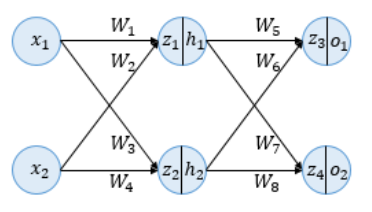

### 순전파

입력받은 데이터를 가 가중치와곱하여 출력을 뽑아내는 과정

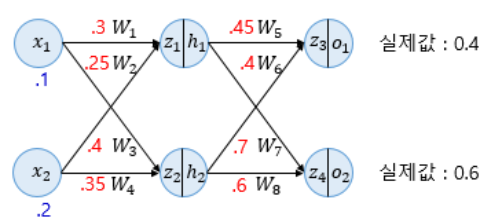

먼저 입력층에서 입력을 받아 은닉층으로 전달되면, 데이터는 아래와 같이 계산됩니다.

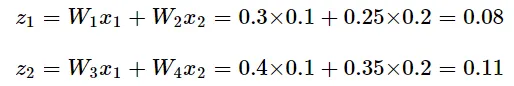

이제 도착한 뉴런에서 [활성화 함수](https://jaeyoon-95.tistory.com/181)를 계산해 줍니다. 여기서는 sigmoid를 사용한다고 가정하겠습니다.

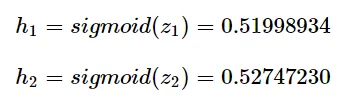

위와 같이 활성화 함수를 통해 은닉층의 각 출력 값을 뽑아냅니다. 이후, 출력층으로 전달하기 위해 가중치들을 곱하여 전달해 줍니다. 식은 아래와 같습니다.

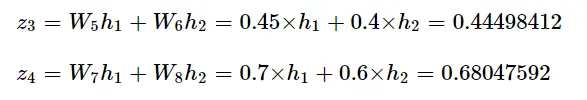

입력층에서 은닉층으로 전달될때와 같은 수식을 가집니다. 위의 값을 입력받은 출력층에서는 이후 활성화 함수를 통해 최종 값을 출력하게됩니다.

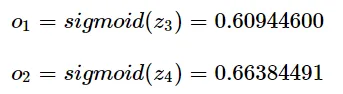

먼저 o1의 경우 예측 값이 약 0.6인데, 실제값은 0.4죠. 약 0.2의 오차가 존재합니다. o2같은 경우 0.66을 예측하였는데, 실제값은 0.6입니다. 약 0.06의 오차가 존재하네요. 신경망 내에서는 이런 오차값들을 다루기 위해 오차 함수를 이용합니다. 오차 함수는 오차를 계산기 위한 손실함수(loss function)입니다. 손실 함수에 대한 이야기는 다음 포스팅에서 다루기로 하고, 여기서는 평균 제곱 오차 MSE를 사용하겠습니다. MSE는 실제값과 출력값의 차이를 제곱한 뒤, 2로 나누는 방법입니다. 즉, 위의 예로 오차를 구하면 아래와 같습니다

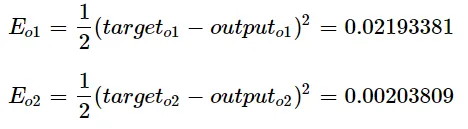

위의 방법이 바로 MSE를 적용하여 각 뉴런의 오차를 구한 식입니다. 따라서 신경망 전체의 오차는 아래와 같습니다.

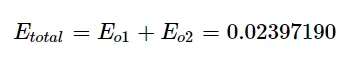

### 역전파

역전파는 말 그대로 순전파의 반대방향으로 전파시키는 방법입니다.
즉, 순전파는 입력층부터 차례로 계산해가며 출력층까지 나아갑니다.먼저 업데이트가 필요한 가중치는 W1,W2,W3,W4,W5,W6,W7,W8로 총 8개 입니다. 이제 역전파를 시작해 보겠습니다.


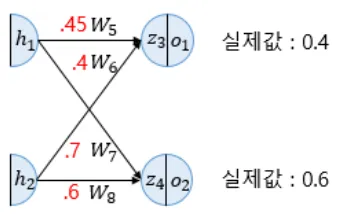

출력층 부터 시작하기 때문에, 먼저 업데이트 되는 가중치는 W5,W6,W7,W8입니다. 가중치를 업데이트 하기 위해서는 최적화 함수가 필요한데, 여기서는 단순히 경사 하강법을 이용하겠습니다. 경사 하강법을 이용하기 위해서는 오차에 대한 기울기가 필요합니다. 예를 들어서 W5를 업데이트 하려면 W5에 대한 미분을 진행해야 합니다.

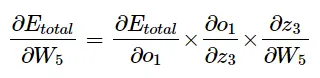

$전체오차를 W5로 편미분한 값 = 전체 오차를 출력값 O_1으로 편미분한값 * 출력값을 예측값으로 미분한값으로 미분한 값 * 예측값을 가중치 W_5 로 미분한 값$

즉, 미분 연쇄 법칙에 따라 위와 같이 풀어서 쓸 수 있습니다. 오른쪽 항의 세 값을 손실 함수로 부터 만들어보겠습니다.

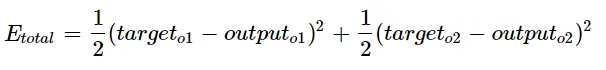

전체 오차는 위의 식으로 구할 수 있죠? 이제 두 항을 o1에 대한 미분을 진행해 봅시다.

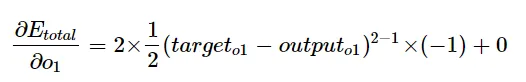

위와 같은 값을 얻을 수 있습니다. 오른쪽의 첫 번째 수식에서 target과 output은 모두 o1를 포함하기 때문에, 항이 사라지지 않았고, 두 번째 수식에서는 o1이 존재하지 않기 때문에 상수취급을 당해 사라졌습니다.

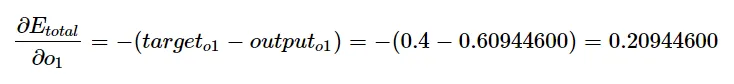

자 이제 식을 계산해 보면 다음과 같이 나옵니다. 이제 z3으로 미분한 구간을 계산합니다. 먼저 o1에 대한 식을 가져와보겠습니다.

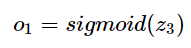

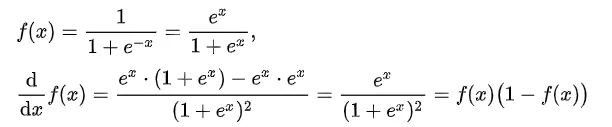

위와 같이 sigmoid함수 f(x)를 미분하면 f(x)(1-f(x))를 얻는 것을 확인할 수 있습니다. 이를 적용하여 z3으로 미분해봅시다.

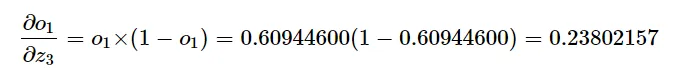

여기서 o1의 값을 알 수 있기 때문에 다음과 같은 값을 얻게됩니다.

마지막으로 W5에 대한 미분을 해보겠습니다. 이를 위해 z3수식을 살펴보겠습니다.

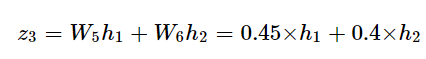

이제 W5에 대한 미분을 해보겠습니다.

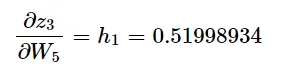

h1값은 알고 있기 때문에, 다음과 같은 값을 얻을 수 있습니다. 이제 모든 값을 구했기 때문에, 이 값들을 모두 곱해주면 됩니다.`

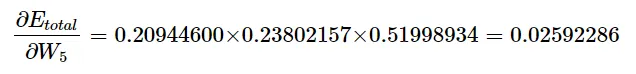

이제 경사 하강법을 이용하여 가중치를 업데이트 해줍시다. 여기서 학습률 α는 0.5라고 합니다.

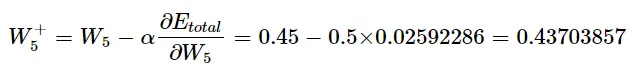

이 식이 왜 나오는지 모르겠다! 하시는 분들은 최적화함수 포스팅을 참고해주세요. 따라서 W5는 0.437이라는 갑으로 업데이트됩니다.

같은 방법으로 가중치 W6,W7,W8를 업데이트 해주시면 됩니다

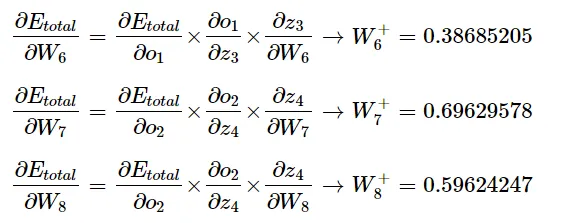

자 이제 은닉층으로 넘어가 보겠습니다. 위의 과정을 모두 거쳤다면, 아래의 그림에 표기된 부분은 업데이트가 된 상태일것입니다.

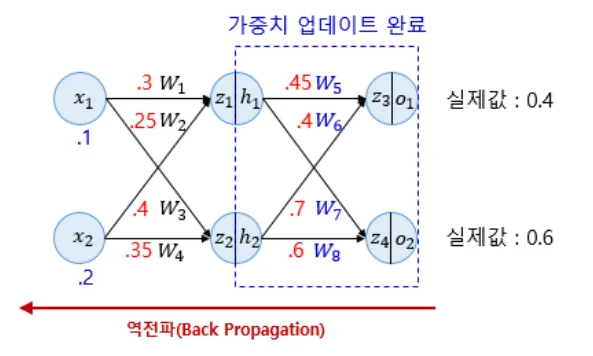

이제 W1,W2,W3,W4에 대한 가중치 업데이트를 해보겠습니다. 먼저 W1를 업데이트 시켜보겠습니다. 위에 했던 과정과 동일하게, 전체 오차를 W1로 미분시켜줍니다.

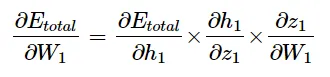

오른쪽 항의 첫 번째 식은 아래와 같이 얻을 수 있습니다.

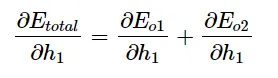

여기서 오른쪽 첫번째 식에 대해서 항분해, 계산을 하면 아래와 같습니다.

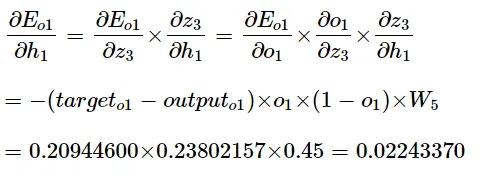

같은 원리로 두 번째 식을 구하면 아래와 같이 나옵니다.

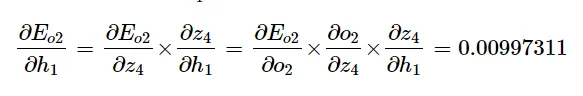

따라서 dEtotal/dh1은 아래와 같은 값을 얻습니다.

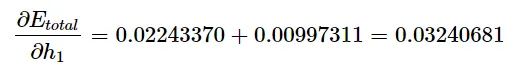

다음으로 dh1/dz1에 대해서는 아래 식을 미분해서 구할 수 있습니다.

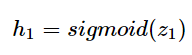

앞에서 했던 계산이죠? sigmoid를 미분하면 f'(x) = f(x)(1-f(x))가 되기 때문에 아래와 같이 값을 구할 수 있습니다.

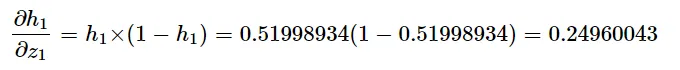

또한 dz1/dW1을 위해 아래의 식을 W1에 대해 미분해봅시다

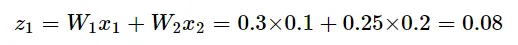

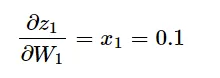

따라서 업데이트 하기 위한 모든 값들은 다 구했습니다.

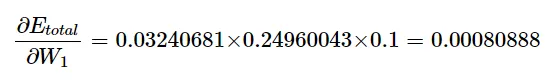

이제 이 값과 최적화 함수를 이용하여 W1를 업데이트 해봅시다.

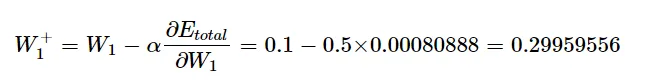

W2,W3,W4과정 모두 동일하게 진행해 주시면 됩니다.

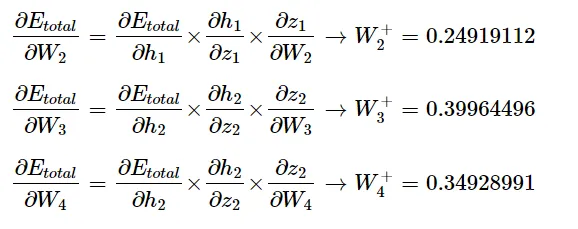

### 텐서플로우 그래이디언트 테이프


In [ ]:
import tensorflow as tf
x = tf.Variable(0.1)

In [ ]:
print(x.numpy())  # 0.1

0.1


In [ ]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.1>

In [ ]:
x =  tf.Variable(0.1,2,3)

In [ ]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.1>

In [ ]:
x =  tf.Variable([1,2,3,4])

In [ ]:
x


<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [ ]:
  x_1 =  tf.Variable(1)
  x_2 =  tf.Variable(1)

In [ ]:
x_1


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>

In [ ]:
x_2

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>

In [ ]:
import tensorflow as tf

# 2차원 배열인 tf.Variable
matrix_var = tf.Variable([[0.1, 0.2], [0.3, 0.4]])
print(matrix_var)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.1, 0.2],
       [0.3, 0.4]], dtype=float32)>


In [ ]:
import tensorflow as tf

# (2, 4) 크기의 2차원 배열 생성
tensor = tf.Variable([[1.0, 2.0, 3.0, 4.0], [5.0, 6.0, 7.0, 8.0]])

# 텐서를 2개의 텐서로 분할
split_tensors = tf.split(tensor, num_or_size_splits=2, axis=1)

# 첫 번째 텐서 (Variable:0 형태로 출력)
print(split_tensors[0])

# 두 번째 텐서 (Variable:1 형태로 출력)
print(split_tensors[1])

tf.Tensor(
[[1. 2.]
 [5. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[3. 4.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [ ]:
split_tensors[0]


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [5., 6.]], dtype=float32)>

In [ ]:
# tf.Variable로 선언
var = tf.Variable([[1.0, 2.0], [3.0, 4.0]])
print(var)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>


In [ ]:
# constant
c1 = tf.constant(1)
c2 = tf.constant([1])
c3 = tf.constant([[1, 2], [3, 4]])

# variable
v1 = tf.Variable(1)
v2 = tf.Variable([1])
v3 = tf.Variable([[-1, 0], [10, 5]])


In [ ]:
v1

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>

In [ ]:
v2

<tf.Variable 'Variable:0' shape=(1,) dtype=int32, numpy=array([1], dtype=int32)>

In [ ]:
v3

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[-1,  0],
       [10,  5]], dtype=int32)>

In [ ]:
print(v1) # <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
print(v2) # <tf.Variable 'Variable_1:0' shape=(1,) dtype=int32_ref>
print(v3) # <tf.Variable 'Variable_2:0' shape=(2, 2) dtype=int32_ref>


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>
<tf.Variable 'Variable:0' shape=(1,) dtype=int32, numpy=array([1], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[-1,  0],
       [10,  5]], dtype=int32)>


In [ ]:
def sRun(input):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        rst = input.eval()
        print(rst)
        return(rst)


In [ ]:
print(v1) # <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
print(v2) # <tf.Variable 'Variable_1:0' shape=(1,) dtype=int32_ref>
print(v3) # <tf.Variable 'Variable_2:0' shape=(2, 2) dtype=int32_ref>

sRun(v1) # 1
sRun(v2) # [1]
sRun(v3) # [[-1  0] [10  5]]


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>
<tf.Variable 'Variable:0' shape=(1,) dtype=int32, numpy=array([1], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[-1,  0],
       [10,  5]], dtype=int32)>


AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
import tensorflow as tf

# 2차원 배열로 변수 정의
matrix_var = tf.Variable([[1.0, 2.0], [3.0, 4.0]])

# 출력 확인
print(matrix_var)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>


In [ ]:
import tensorflow as tf

x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
gradient = tape.gradient(y, x)
print(gradient)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
x= tf.Variable(tf.zeros([2,2]))
with tf.GradientTape() as tape:
  y = 2*x + 3
gradient = tape.gradient(y, x)
print(gradient)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform([2,2])

In [ ]:
W

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.65302825, 0.40731537],
       [0.4500265 , 0.96602523]], dtype=float32)>

In [ ]:
b

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [ ]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.6570318 , 0.65317893],
       [0.20638001, 0.41066277]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(f"가중치{W}")
print(f"인풋{x}")
print(f"절편{b}")
print(f"기울기{grad_of_y_wrt_W_and_b}" ) # 각

가중치<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.47575355, 0.45938647],
       [0.9560243 , 0.01921296]], dtype=float32)>
인풋[[0.34411216 0.61247396]
 [0.93913484 0.08512712]]
절편<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
기울기[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.283247 , 1.283247 ],
       [0.6976011, 0.6976011]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]


위에 코드가 어떤식으로 동작하냐면

$ W =  \begin{bmatrix}0.47575355 & 0.45938647 \\ 0.9560243  & 0.01921296 \end{bmatrix}  $
$ X  =\begin{bmatrix}0.34411216 & 0.61247396  \\ 0.93913484  & 0.08512712 \end{bmatrix}$
$ b  =\begin{bmatrix}0 & 0 \end{bmatrix}$
에서

다음과 같은 각 기울기는 $y = tf.matmul(x,W)+ b$를 통해 구할 수 있습니다.

행렬곱부터 계산해보면

$y = \begin{bmatrix} 0.34411216 & 0.61247396 \\ 0.2301892 & 0.45938647 \end{bmatrix}  * \begin{bmatrix} 0.47575355 & 0.45938647 \\ 0.9560243 & 0.01921296 \end{bmatrix} $

$y = \begin{bmatrix} x_1 & x_2 \\ x_3 &x_4 \end{bmatrix} * \begin{bmatrix}  W_1 & W_2 \\ W_3 & W_4   \end{bmatrix}$ 이렇게 치환했을때

각 행과  각 열에 대해서 행렬곱을 하는 것입니다.
첫번째 행의 첫번째 요소는  

$(x_1 * W_1) + (x_2 * W_3) = y_1$

$(x_1 * W_2) +  (x_2 * W_4) =  y_2$

$(x_3*W_1)+ (x_4*W_3) = y_3$

$(x_3*W_2)+ (x_4*W_4 ) =  y_4$

최종적으로 y 의 값은 아래와 같이 구성됩니다.

$y= \begin{bmatrix}y_1 & y_2 \\ y_3 & y_4   \end{bmatrix}$




$y= \begin{bmatrix}0.74869714
 & 0.16983708 \\ 0.16937634 & 0.1070085  \end{bmatrix}$

###기울기 계산

W 에 대한 기울기:

기울기 계산은 y에 대한 W의 편미분입니다. W에 대한 기울기는 대응하는 x 값이 됩니다.

$(x_1 * W_1) + (x_2 * W_3) = y_1$

$(x_1 * W_2) +  (x_2 * W_4) =  y_2$

$(x_3*W_1)+ (x_4*W_3) = y_3$

$(x_3*W_2)+ (x_4*W_4 ) =  y_4$

위에 값들은 W 에 대해 편미분을 하면

$x_1 + x_2  = y_1$

$x_1  +  x_2  =  y_2$

$x_3+ x_4 = y_3$

$x_3+ x_4 =  y_4$

편미분한 값은 위와 같이 되어 각 $x_1 + x_2$가 기울기가 되는 방식입니다.

종합적으로 W에 대한 기울기는  아래와 같습니다.

$gradOfyWrtW  $  $= \begin{bmatrix} 1.283247 & 1.283247 \\ 0.6976011 & 0.6976011  \end{bmatrix}$

b에 대한 편미분 값은
이 상황에서 편미분은 y=matmul(x,W)+b에서 b에 대한 기울기를 구하는 것입니다. b는 절편 (bias)로, 행렬 곱 연산 결과에 더해집니다.

위의 식은 사실상 $y = ax + b $와 같은 원리 입니다 그렇기에 $x$ 값이 같은 경우 "b"값도 동일하게 출력값에 더해지는 구조입니다.

$y_1 =  (x_1 ⋅W_1) +  (x_2⋅W_3)+ b_1$

$y_3 =  (x_1 ⋅W_2) +  (x_2⋅W_4)+ b_2$

$y_2 =  (x_3 ⋅W_1) +  (x_4⋅W_3)+ b_1$

$y_4 =  (x_3 ⋅W_2) +  (x_4⋅W_4)+ b_2$

$y_1 =  (x_1 ⋅W_1) +  (x_2⋅W_3)+ b_1$

$y_3 =  (x_1 ⋅W_2) +  (x_2⋅W_4)+ b_2$

$y_2 =  (x_3 ⋅W_1) +  (x_4⋅W_3)+ b_1$

$y_4 =  (x_3 ⋅W_2) +  (x_4⋅W_4)+ b_2$ 에 대해 $b_1 , b_2$ 에 대한 기울기를 구하면

$y_1 =  0  +  0 + 1  (b_1)$

$y_2 =  0  +  0 + 1   (b_2)$

$y_3 =  0  +  0 + 1 (b_1)$

$y_4 =  0  +  0 + 1 (b_2)$입니다.


In [ ]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 텐서플로우를 통한 레이어 굴현

In [ ]:
import tensorflow as tf

class NavieDense:
  def __init__(self , input_size , output_size , activation):
    self.activation = activation
    w_shape = (input_size , output_size)
    w_initial_value = tf.random.uniform(w_shape , minval=0 , maxval=1e-1)
    self.W = tf.Variable(w_initial_value)
    b_shape = (output_size,)
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, *args: Any, **kwds: Any):
     return self.activation(tf.matmul(args,self.W) + self.b)

  @property
  def weights(self):
    return [self.W,self.b]


In [ ]:
import tensorflow as tf

class NaiveDense:
  def __init__(self, input_size, output_size, activation):
    self.activation = activation
    w_shape = (input_size, output_size) # 입력과 출력의 사이즈를통해 가중치의 형태 정의
    w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1) # w_shape 만큼 배열생성
    self.W = tf.Variable(w_initial_value)
    b_shape = (output_size,)
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs):
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self):
    return [self.W, self.b]

# 사용 예시
dense_layer = NaiveDense(input_size=3, output_size=2, activation=tf.nn.relu)
inputs = tf.constant([[1.0, 2.0, 3.0]])
output = dense_layer(inputs)
print(output)

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x # 각 층을 반환

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)